
# Netflix Content Analysis - Data Analysis and Visualization
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

### Questions addressed:
#### - What was the most frequent duration of movies released in the 1990s?
#### - How many action movies with a duration less than 90 minutes were released in the 1990s?
#### - What is the distribution of movie durations across different genres in the 1990s?
#### - How has the average duration of movies changed over the decades?
#### - What are the top 10 countries producing the most content on Netflix?
#### - Is there a relationship between the release year and the number of cast members in Netflix movies?
#### - What are the most common words in movie titles for different genres?
####
####
####

In [7]:
import pandas as pd

# Reading the dataset as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [9]:
# Subsetting all movies
netflix_movies_subset = netflix_df[netflix_df["type"] == "Movie"]
print(netflix_movies_subset)

     show_id   type       title           director  \
0         s2  Movie        7:19  Jorge Michel Grau   
1         s3  Movie       23:59       Gilbert Chan   
2         s4  Movie           9        Shane Acker   
3         s5  Movie          21     Robert Luketic   
5         s7  Movie         122    Yasir Al Yasiri   
...      ...    ...         ...                ...   
4807   s7779  Movie  Zombieland    Ruben Fleischer   
4808   s7781  Movie         Zoo       Shlok Sharma   
4809   s7782  Movie        Zoom       Peter Hewitt   
4810   s7783  Movie        Zozo        Josef Fares   
4811   s7784  Movie      Zubaan        Mozez Singh   

                                                   cast        country  \
0     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

In [11]:
# Filtering out all movies released earlier than 1990
subset = netflix_movies_subset[netflix_movies_subset["release_year"] >= 1990]
print(subset)

     show_id   type       title           director  \
0         s2  Movie        7:19  Jorge Michel Grau   
1         s3  Movie       23:59       Gilbert Chan   
2         s4  Movie           9        Shane Acker   
3         s5  Movie          21     Robert Luketic   
5         s7  Movie         122    Yasir Al Yasiri   
...      ...    ...         ...                ...   
4807   s7779  Movie  Zombieland    Ruben Fleischer   
4808   s7781  Movie         Zoo       Shlok Sharma   
4809   s7782  Movie        Zoom       Peter Hewitt   
4810   s7783  Movie        Zozo        Josef Fares   
4811   s7784  Movie      Zubaan        Mozez Singh   

                                                   cast        country  \
0     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

In [13]:
# Filtering out all movies released later than the 1990s; hence, getting a subset of movies released only in the 1990s
netflix_1990s = subset[subset["release_year"] < 2000]
print(netflix_1990s)

     show_id   type                            title            director  \
6         s8  Movie                              187      Kevin Reynolds   
118     s167  Movie                A Dangerous Woman  Stephen Gyllenhaal   
145     s211  Movie           A Night at the Roxbury    John Fortenberry   
167     s239  Movie  A Thin Line Between Love & Hate     Martin Lawrence   
194     s274  Movie                     Aashik Awara         Umesh Mehra   
...      ...    ...                              ...                 ...   
4672   s7536  Movie                      West Beirut        Ziad Doueiri   
4689   s7571  Movie      What's Eating Gilbert Grape     Lasse Hallström   
4718   s7624  Movie                   Wild Wild West    Barry Sonnenfeld   
4746   s7682  Movie                       Wyatt Earp     Lawrence Kasdan   
4756   s7695  Movie                      Yaar Gaddar         Umesh Mehra   

                                                   cast        country  \
6     Samuel 

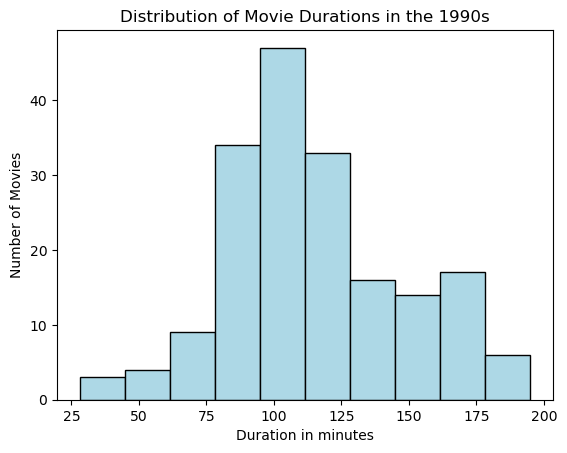

In [76]:
import matplotlib.pyplot as plt

# Plotting a Histogram with the distribution of duration of movies released in the 1990s
plt.hist(netflix_1990s["duration"], color = 'lightblue', edgecolor = 'black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Movies')
plt.show()

In [17]:
duration = 100 # most frequent movie duration in the 1990s (approximately)

In [26]:
# Subsetting all action movies from the 1990s
action_movies_1990s = netflix_1990s[netflix_1990s["genre"]=="Action"]
print(action_movies_1990s)

     show_id   type                                  title  \
352     s508  Movie                        Andaz Apna Apna   
431     s628  Movie  Austin Powers: The Spy Who Shagged Me   
468     s688  Movie                               Bad Boys   
515     s757  Movie                                Barsaat   
675    s1003  Movie                            Blue Streak   
815    s1236  Movie                          Casino Tycoon   
816    s1237  Movie                        Casino Tycoon 2   
1018   s1605  Movie                           Dante's Peak   
1179   s1850  Movie                            Dragonheart   
1288   s2039  Movie              EVANGELION: DEATH (TRUE)²   
1299   s2060  Movie                     Executive Decision   
1504   s2394  Movie                                 Ghayal   
1515   s2408  Movie                      Ghulam-E-Musthafa   
1548   s2466  Movie                              GoldenEye   
1599   s2551  Movie                                 Gumrah   
1661   s

In [28]:
# Counting short action movies from the 1990s

short_movie_count = 0

for label, row in action_movies_1990s.iterrows():
    if row["duration"] < 90:
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count
print(short_movie_count)
        

7


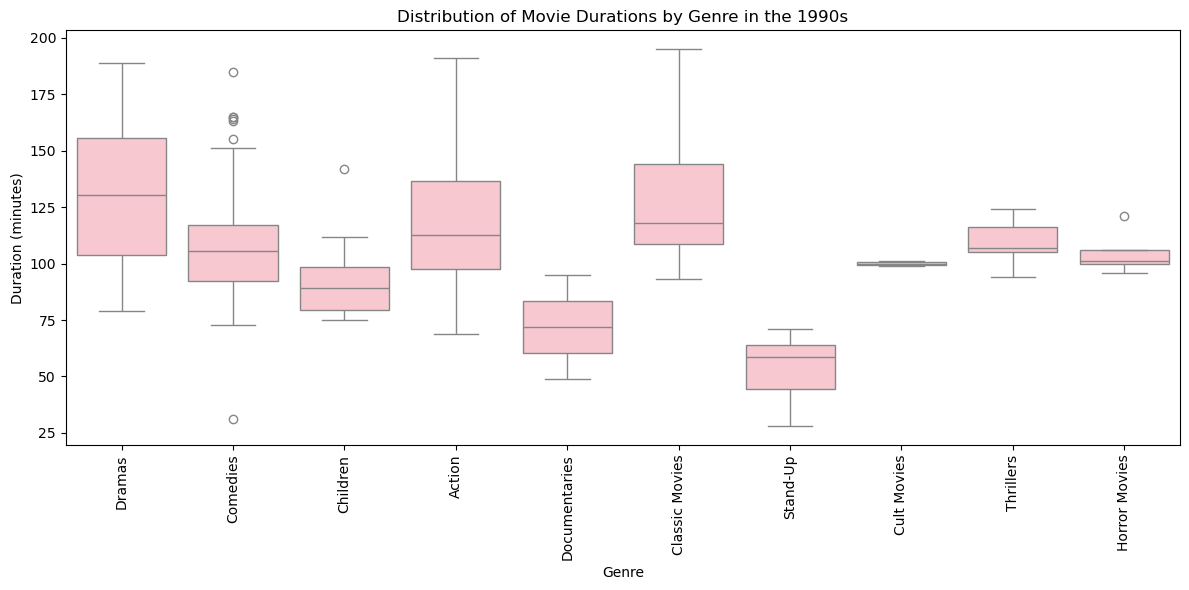

In [82]:
import seaborn as sns

genre_duration = netflix_1990s[["genre", "duration"]]

# Plotting a BoxPlot with the distribution of duration of movies across different genres in the 1990s
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='duration', data=genre_duration, color='pink')
plt.xticks(rotation=90)
plt.title('Distribution of Movie Durations by Genre in the 1990s')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()

In [37]:
netflix_df['decade'] = (netflix_df['release_year'] // 10) * 10 #gives the decade of each year any of the movies were released

# Finding the average duration for movies released in each decade
decade_avg_duration = netflix_df[netflix_df['type'] == 'Movie'].groupby('decade')['duration'].mean()
print(decade_avg_duration)

decade
1940     51.400000
1950    107.090909
1960    144.250000
1970    119.083333
1980    113.557895
1990    115.120219
2000    113.424448
2010     99.797980
2020     94.270115
Name: duration, dtype: float64


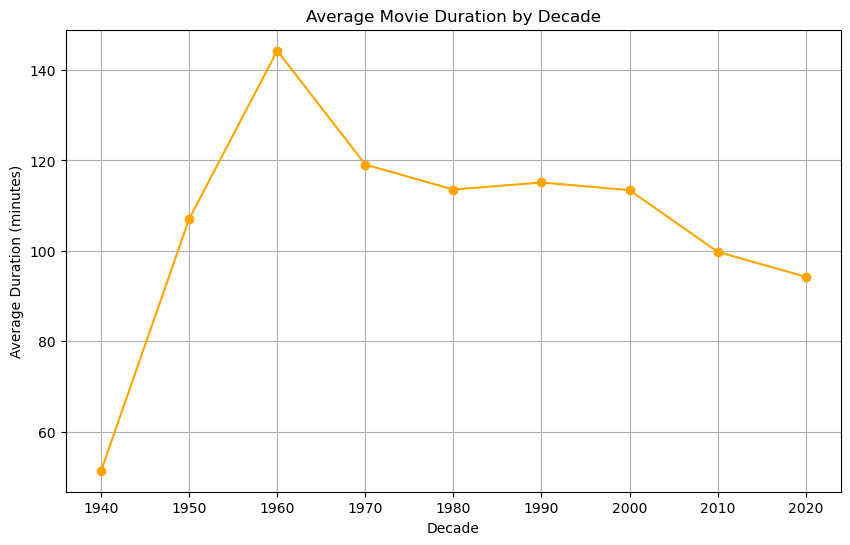

In [80]:
# Plotting a Line Graph for the same
plt.figure(figsize=(10, 6))
decade_avg_duration.plot(kind='line', marker='o', color = 'orange')
plt.title('Average Movie Duration by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.xticks(decade_avg_duration.index)
plt.grid(True)
plt.show()

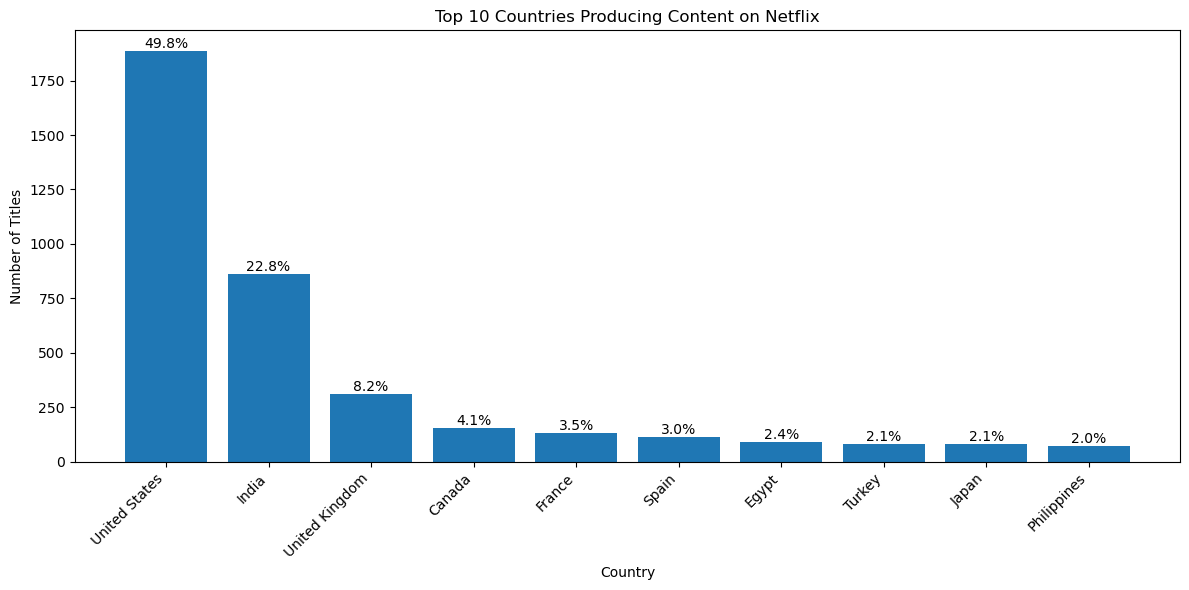

In [66]:
# Top 10 countries that produce the most content on Netflix
top_countries = netflix_df['country'].value_counts().head(10)

# To calculate percentages
total_content = top_countries.sum()
percentages = (top_countries / total_content) * 100

plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values)
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_content) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


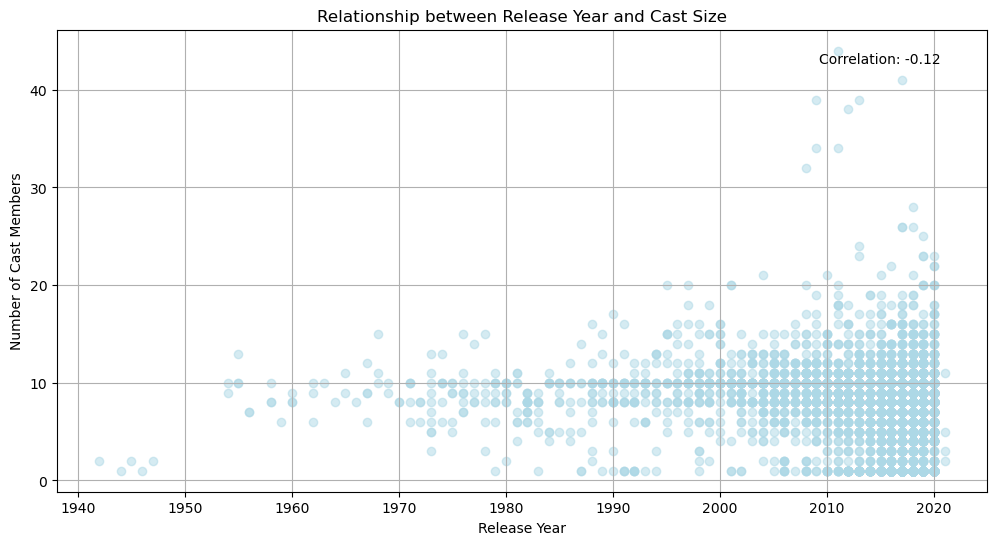

Correlation coefficient: -0.12


In [103]:
# Correlation between number of cast members and release year

import matplotlib.pyplot as plt

# Extract the number of cast members
netflix_df['cast_count'] = netflix_df['cast'].str.split(',').str.len()

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(netflix_df['release_year'], netflix_df['cast_count'], alpha=0.5, color='lightblue')
plt.title('Relationship between Release Year and Cast Size')
plt.xlabel('Release Year')
plt.ylabel('Number of Cast Members')
plt.grid(True)

# Calculate and display the correlation coefficient
correlation = netflix_df['release_year'].corr(netflix_df['cast_count'])
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

print(f"Correlation coefficient: {correlation:.2f}")



##### Since the correlation coefficient of -0.12 is too weak to suggest any meaningful relationship between release year and cast size, so no, these two variables do not have a meaningful statistical relationship. 

Note: you may need to restart the kernel to use updated packages.


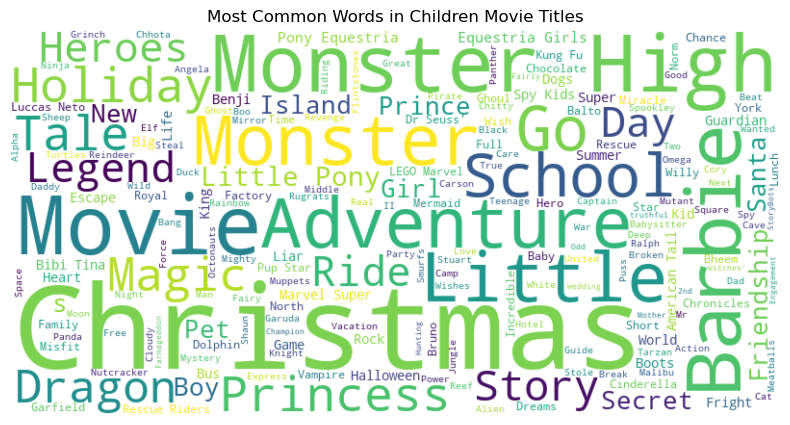

In [95]:
# Finding most common words in movie titles for the 'Children' genre

%pip install wordcloud
from wordcloud import WordCloud

def generate_wordcloud(genre):
    titles = ' '.join(netflix_df[netflix_df['genre'] == genre]['title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {genre} Movie Titles')
    plt.show()

generate_wordcloud('Children')